# **Heap**

A heap is a data structure that is an implementation of the priority queue.

Note that a priority queue is an abstract data structure. A heap is one of many ways to implement a priority queue. However, people often use the two terms interchangeably. In this course, we will use the term "heap".

A heap is a container that stores elements, and supports the following operations:

- Add an element in O(logn)
- Remove the minimum element in O(logn)
- Find the minimum element in O(1)

A heap can also find the max elements instead of the min elements. If a heap is configured to find/remove the min element, it's called a min heap. If it's configured to find/remove the max element, it's called a max heap.

**How is a heap implemented?**

Like a hash map, all major programming languages will have support for a heap, so you don't need to implement it yourself. In terms of solving algorithm problems, you only really care about the interface, not how it is implemented. But like with hash maps, it's still good to understand the implementation in case you are asked about it in an interview.

    For brevity, we'll talk about min heaps in this article, although the logic is the same for max heaps.

There are multiple ways to implement a heap, although the most popular way is called a binary heap using an array. In the trees and graphs chapter, we saw that binary trees are typically implemented with a Node object.

A binary heap implements a binary tree, but with only an array. The idea is that each element in the array is a node in the tree. The smallest element in the tree is the root, and the following property is maintained at every node: if A is the parent of B, then A.val <= B.val. Notice that this property directly implies that the root is the smallest element.

    Another constraint is that the tree must be a complete tree.

The parent-child relationships are done using math with the indices. The first element at index 0 is the root, then the elements at indices 1 and 2 are the root's children, the elements at indices 3 and 4 are the children of the element at index 1 and the elements at indices 5 and 6 are the children of the element at index 2, and so on. If a node is at index i, then its children are at indices 2i + 1 and 2i + 2. When elements are added or removed, operations are done to maintain the aforementioned property of parent.val <= child.val. The number of operations needed scales logarithmically with the number of elements in the heap, and the process is known as "bubbling up".

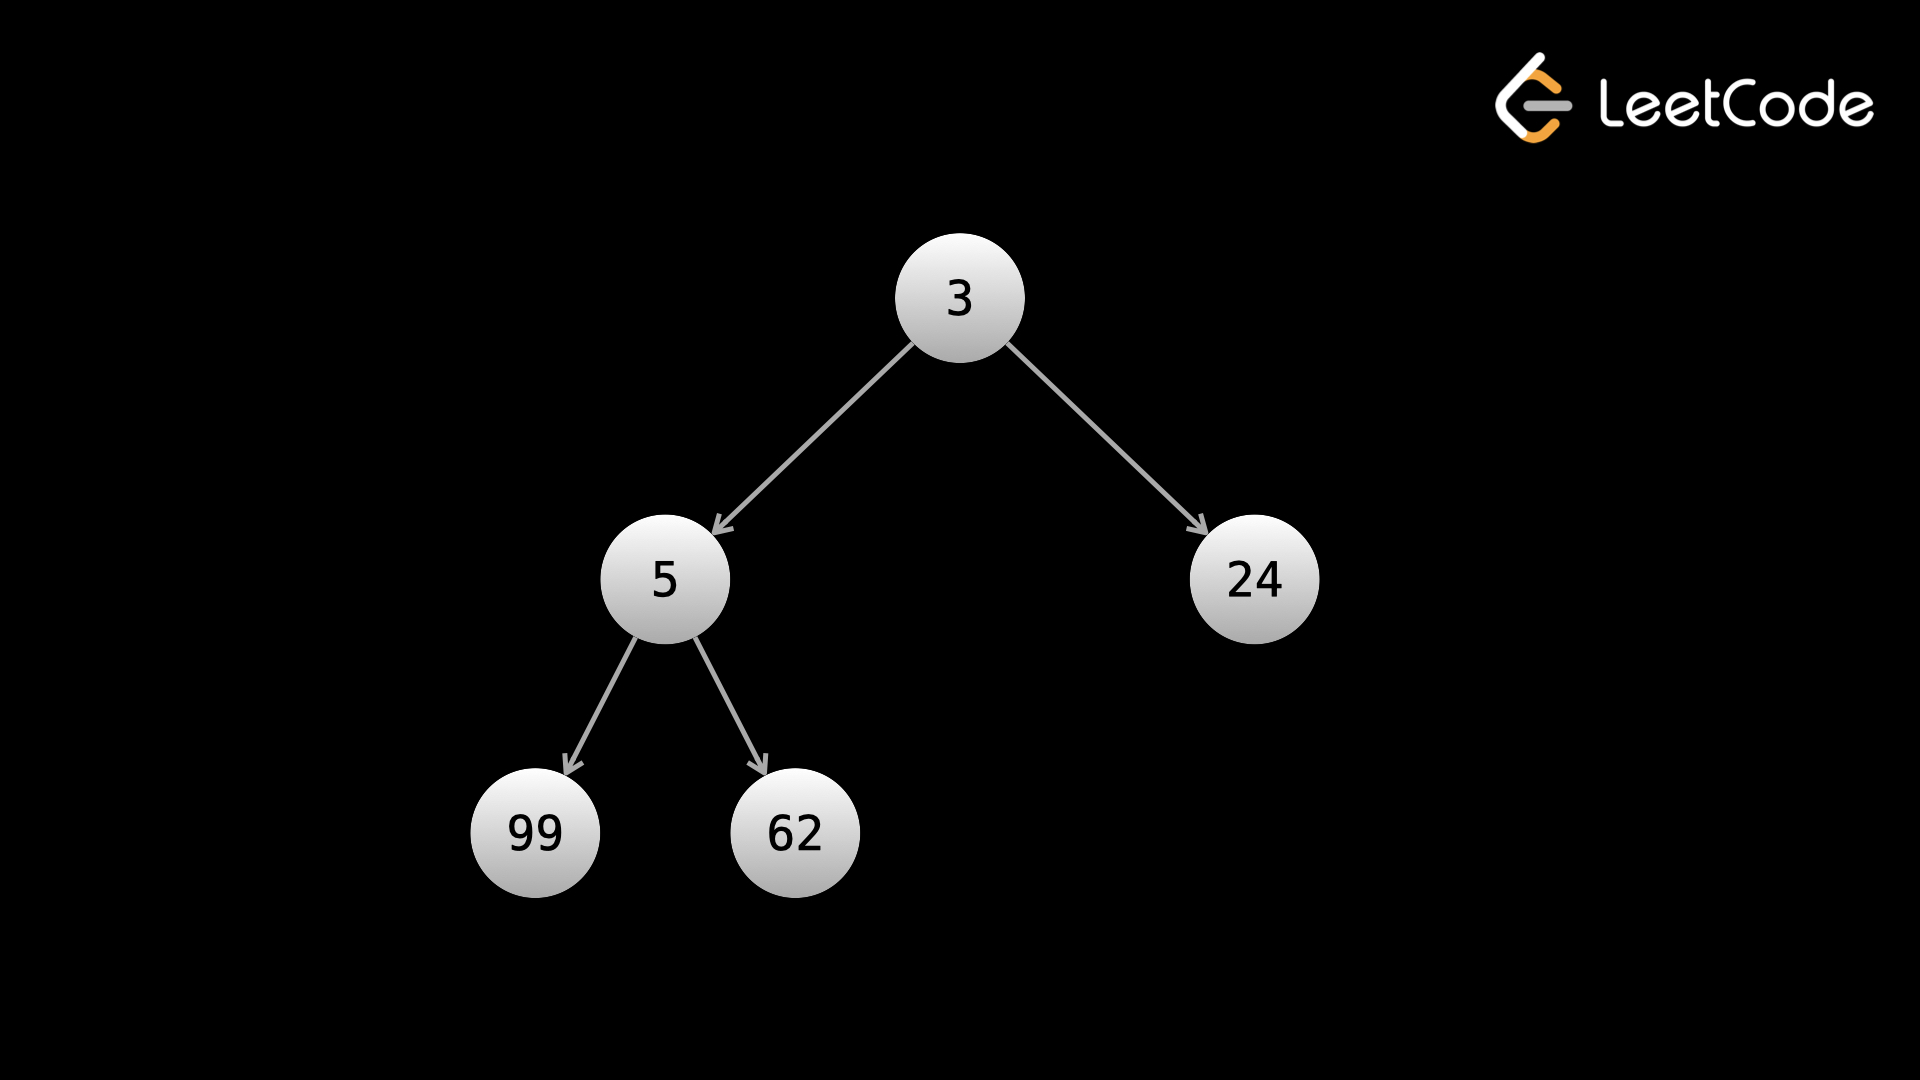

    An existing array of elements can also be converted into a heap in linear time, although the process is complicated. Luckily, some major programming languages have built-in methods to do this.

Remember: you shouldn't worry too much about how heaps are implemented. The important thing is that you understand the interface. We have included implementation details in this article for the sake of completeness.`

In many problems, using a heap can improve an algorithm's time complexity from O(n2) to O(n⋅logn), which is a massive improvement (for n = 1,000,000, this is 50,000 times faster). A heap is a great option whenever you need to find the maximum or minimum of something repeatedly.

**Interface guide**

Here's a quick runthrough of the interface for a heap in major languages:

In [1]:
# In Python, we will use the heapq module
# Note: heapq only implements min heaps
from heapq import *

# Declaration: heapq does not give you a heap data structure.
# You just use a normal list, and heapq provides you with
# methods that can be used on this list to perform heap operations
heap = []

# Add to heap
heappush(heap, 1)
heappush(heap, 2)
heappush(heap, 3)

# Check minimum element
heap[0] # 1

# Pop minimum element
heappop(heap) # 1

# Get size
len(heap) # 2

# Bonus: convert a list to a heap in linear time
nums = [43, 2, 13, 634, 120]
heapify(nums)

# Now, you can use heappush and heappop on nums
# and nums[0] will always be the minimum element

In [2]:
import heapq

# Note: Python's heapq implements a min heap

heap = [67, 341, 234, -67, 12, -976]
heapq.heapify(heap)

heapq.heappush(heap, 7451)
heapq.heappush(heap, -5352)

# The numbers will be printed in sorted order
while heap:
    print(heapq.heappop(heap))

-5352
-976
-67
12
67
234
341
7451


**Heap examples**

A heap is an amazing tool whenever you need to repeatedly find the maximum or minimum element. Let's look at some example problems.

Example 1: 1046. Last Stone Weight

You are given an array of integers stones where stones[i] is the weight of the ith  stone. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. If x == y, then both stones are destroyed. If x != y, then x is destroyed and y loses x weight. Return the weight of the last remaining stone, or 0 if there are no stones left.